In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("staffing_train.csv")

In [4]:
print(df.head(20))

          date section_id  employees_on_duty  total_task_time_minutes
0   2021-01-01    SEC-001                  1               834.569483
1   2021-01-01    SEC-002                  4              1525.368990
2   2021-01-01    SEC-003                  2               662.095279
3   2021-01-01    SEC-004                  4              1499.112620
4   2021-01-01    SEC-005                  3              1238.533073
5   2021-01-01    SEC-006                 11              4283.154645
6   2021-01-04    SEC-001                  1               767.698506
7   2021-01-04    SEC-002                  7              2717.770275
8   2021-01-04    SEC-003                  6              2485.334696
9   2021-01-04    SEC-004                  6              2097.884599
10  2021-01-04    SEC-005                  4              1556.520829
11  2021-01-04    SEC-006                  6              1873.923819
12  2021-01-05    SEC-001                  4              1530.652495
13  2021-01-05    SE

In [5]:
print(df.tail(20))

            date section_id  employees_on_duty  total_task_time_minutes
5782  2024-12-26    SEC-005                  7              2543.213107
5783  2024-12-26    SEC-006                  8              2955.184394
5784  2024-12-27    SEC-001                  5              1413.942415
5785  2024-12-27    SEC-002                  2              1022.775682
5786  2024-12-27    SEC-003                  2               615.576246
5787  2024-12-27    SEC-004                  4              1288.723110
5788  2024-12-27    SEC-005                 10              3623.308966
5789  2024-12-27    SEC-006                  5              1987.666281
5790  2024-12-30    SEC-001                  3              1476.008272
5791  2024-12-30    SEC-002                  5              2094.648238
5792  2024-12-30    SEC-003                  1               836.813742
5793  2024-12-30    SEC-004                  3               907.255329
5794  2024-12-30    SEC-005                  5              1721

In [6]:
# CHECK 1 – each date has 6 sections
# -----------------------------------
counts = df.groupby('date').size()
dates_missing_sections = counts[counts != 6]
print("Dates that do NOT have all 6 sections:")
print(dates_missing_sections)

Dates that do NOT have all 6 sections:
Series([], dtype: int64)


In [7]:
# CHECK 2 – dates are continuous
# -----------------------------------
# convert 'date' to datetime format if it's still a string
df['date'] = pd.to_datetime(df['date'])


In [8]:
# generate full date range from min to max
full_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')


In [9]:
# convert the dataframe dates into a DatetimeIndex and take the difference
missing_dates = full_range.difference(pd.DatetimeIndex(df['date']))

print("Missing calendar dates:")
print(missing_dates)

Missing calendar dates:
DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-09', '2021-01-10',
               '2021-01-14', '2021-01-16', '2021-01-17', '2021-01-23',
               '2021-01-24', '2021-01-28',
               ...
               '2024-12-01', '2024-12-07', '2024-12-08', '2024-12-14',
               '2024-12-15', '2024-12-21', '2024-12-22', '2024-12-25',
               '2024-12-28', '2024-12-29'],
              dtype='datetime64[ns]', length=494, freq=None)


In [10]:
# Show missing dates with their day of week
missing_dates_df = pd.DataFrame({'date': missing_dates})
missing_dates_df['day_of_week'] = missing_dates_df['date'].dt.day_name()
print(missing_dates_df)

          date day_of_week
0   2021-01-02    Saturday
1   2021-01-03      Sunday
2   2021-01-09    Saturday
3   2021-01-10      Sunday
4   2021-01-14    Thursday
..         ...         ...
489 2024-12-21    Saturday
490 2024-12-22      Sunday
491 2024-12-25   Wednesday
492 2024-12-28    Saturday
493 2024-12-29      Sunday

[494 rows x 2 columns]


In [11]:
# Count missing dates by day of week
day_counts = missing_dates_df['day_of_week'].value_counts()
print(day_counts)

day_of_week
Saturday     209
Sunday       209
Monday        19
Thursday      18
Friday        18
Wednesday     11
Tuesday       10
Name: count, dtype: int64


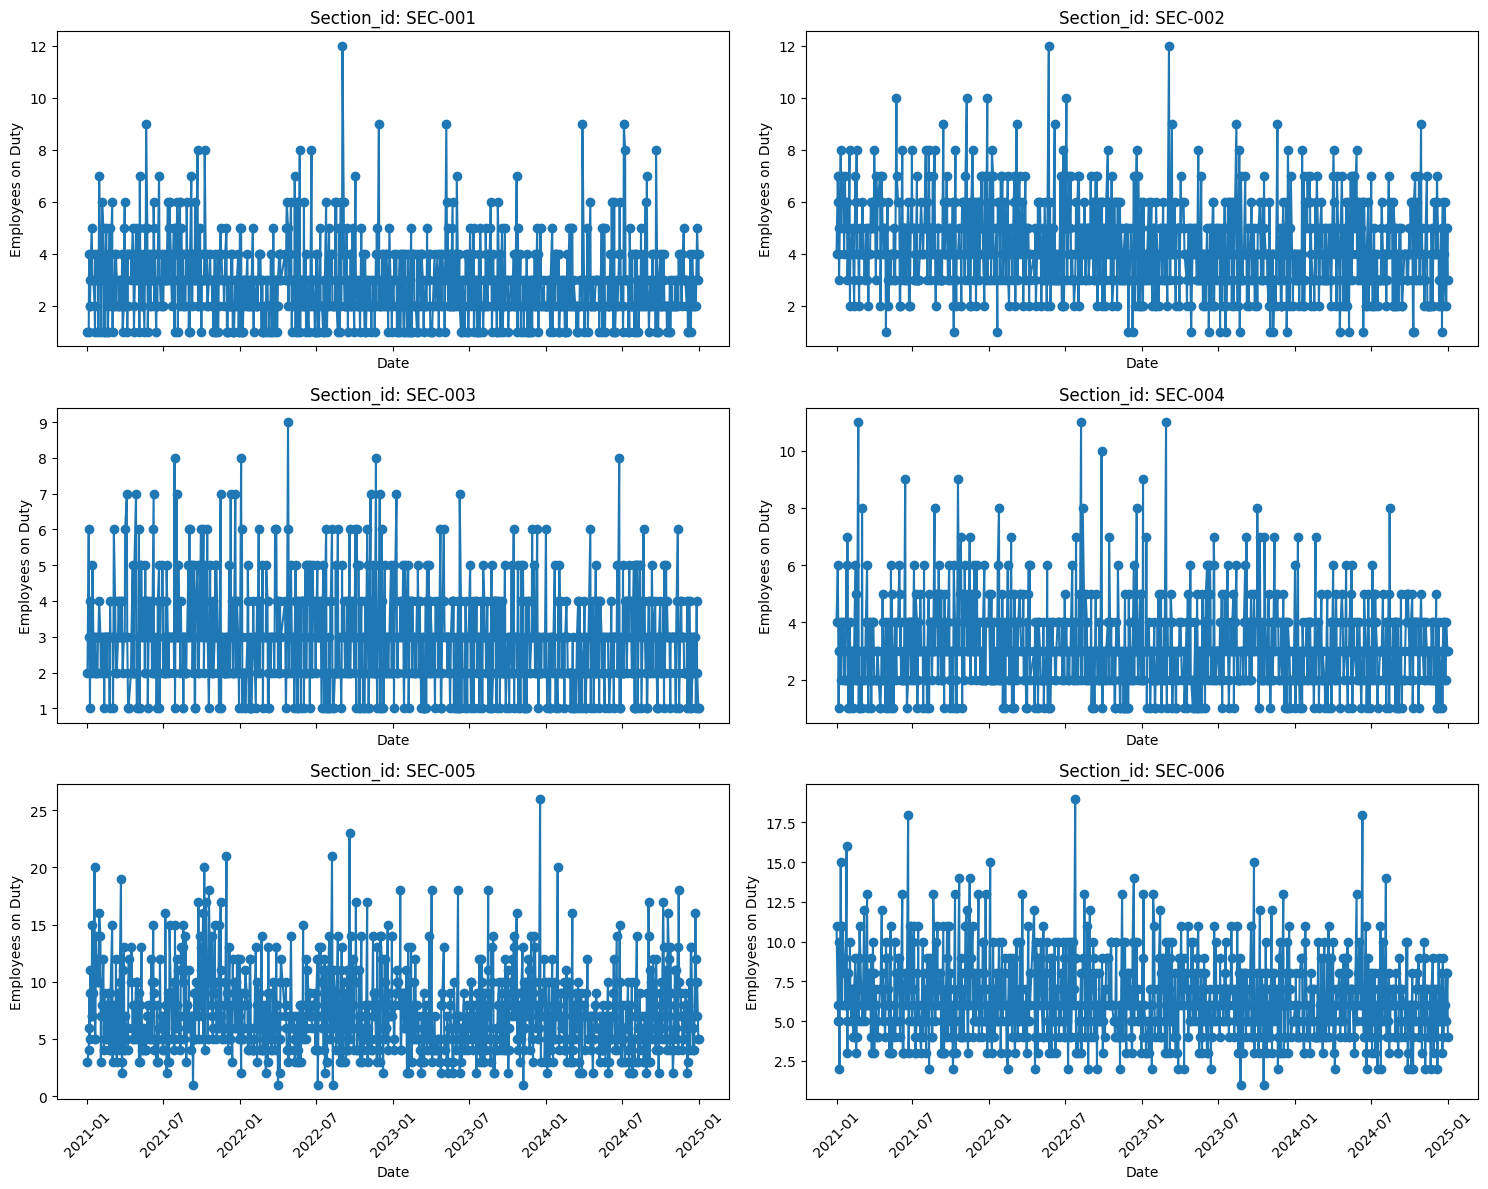

In [14]:
import matplotlib.pyplot as plt

# Get unique sections
sections = df['section_id'].unique()

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
axes = axes.flatten()

for i, section in enumerate(sections):
    section_df = df[df['section_id'] == section]
    axes[i].plot(section_df['date'], section_df['employees_on_duty'], marker='o')
    axes[i].set_title(f'Section_id: {section}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Employees on Duty')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

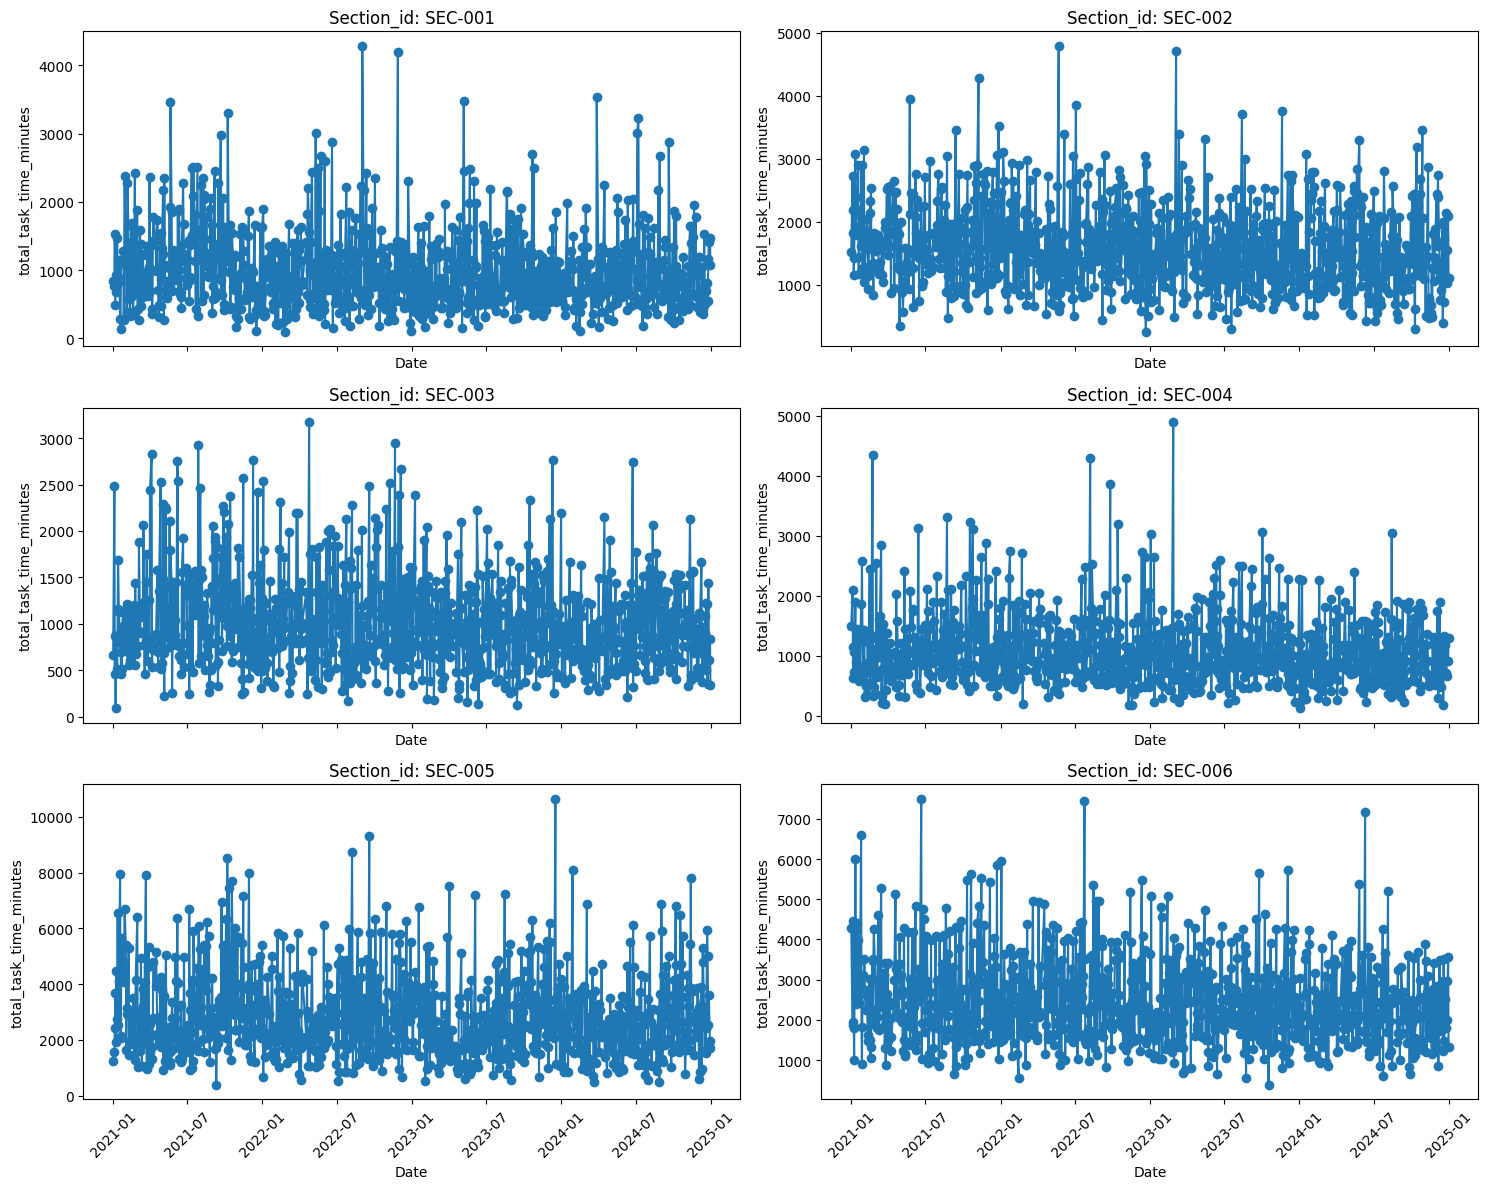

In [15]:
import matplotlib.pyplot as plt

# Get unique sections
sections = df['section_id'].unique()

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
axes = axes.flatten()

for i, section in enumerate(sections):
    section_df = df[df['section_id'] == section]
    axes[i].plot(section_df['date'], section_df['total_task_time_minutes'], marker='o')
    axes[i].set_title(f'Section_id: {section}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('total_task_time_minutes')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

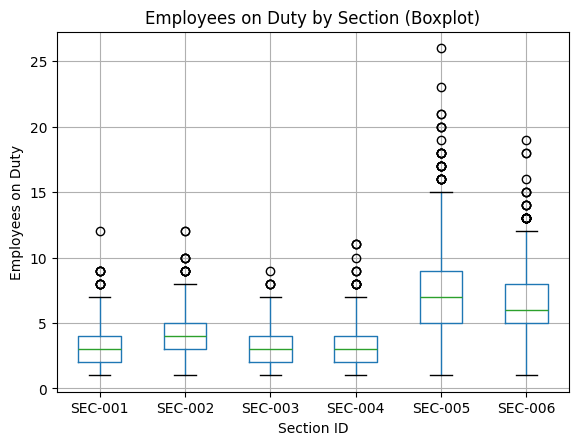

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot(column='employees_on_duty', by='section_id')
plt.title('Employees on Duty by Section (Boxplot)')
plt.suptitle('')
plt.xlabel('Section ID')
plt.ylabel('Employees on Duty')
plt.show()

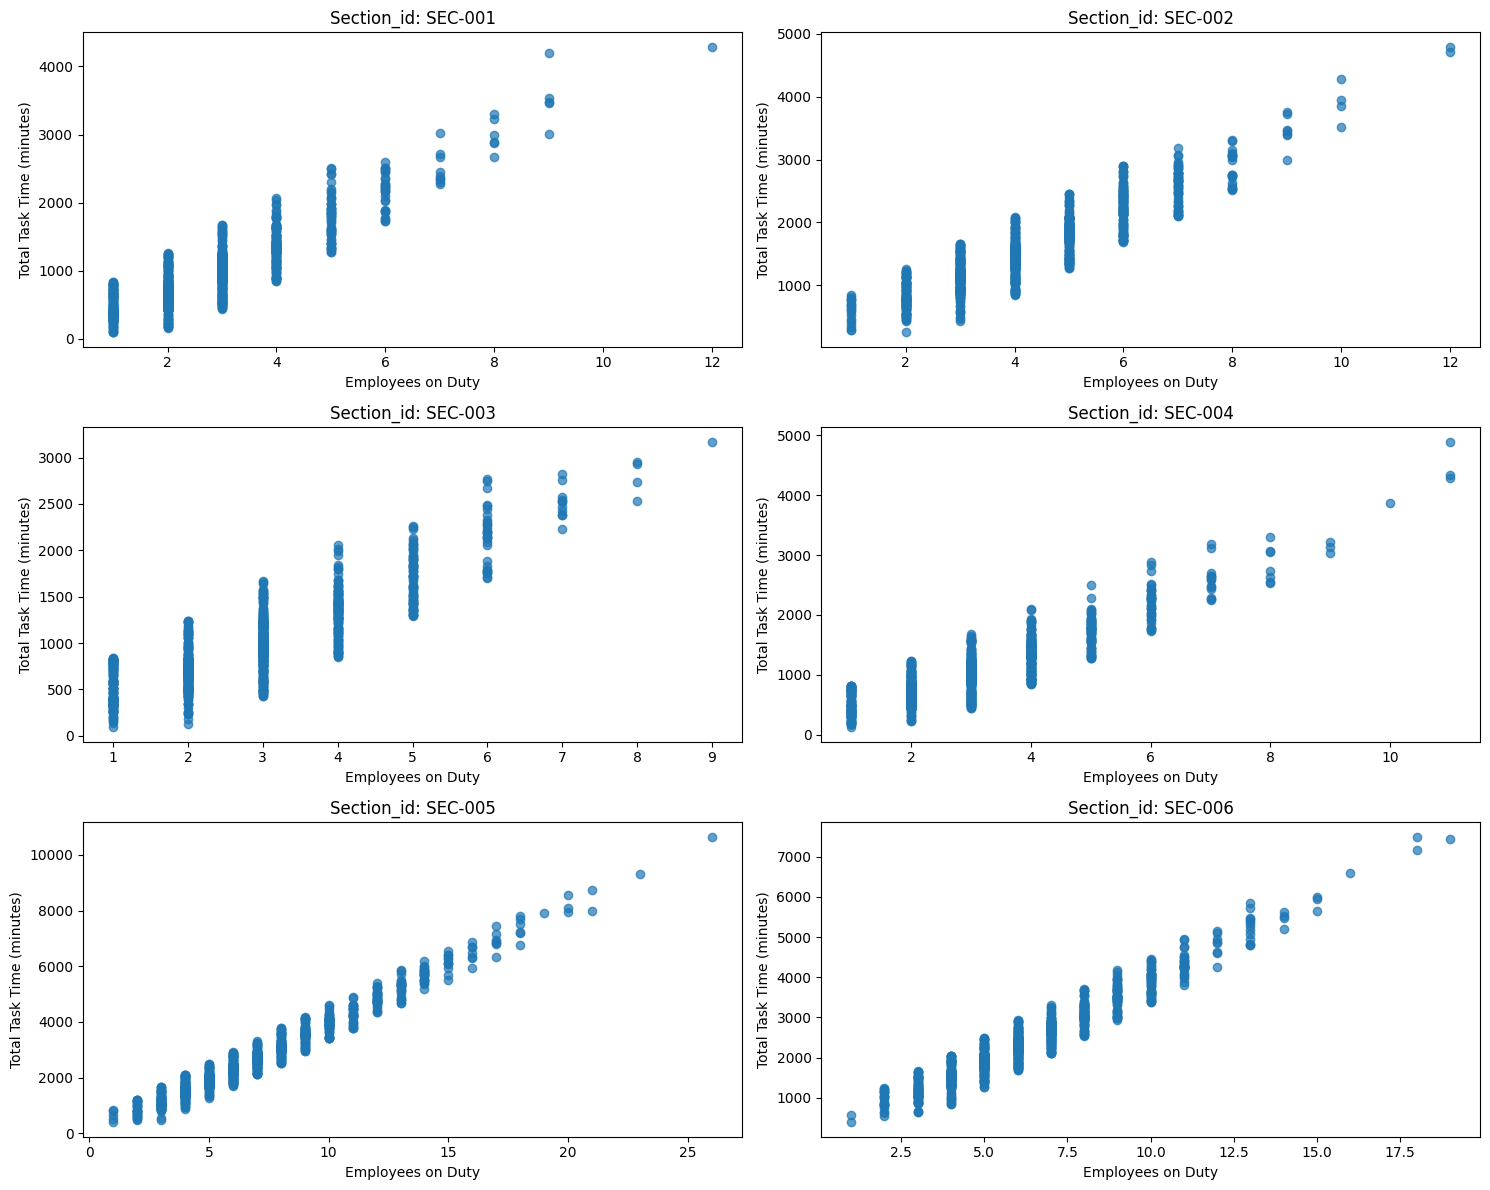

In [17]:
import matplotlib.pyplot as plt

sections = df['section_id'].unique()
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, section in enumerate(sections):
    section_df = df[df['section_id'] == section]
    axes[i].scatter(section_df['employees_on_duty'], section_df['total_task_time_minutes'], alpha=0.7)
    axes[i].set_title(f'Section_id: {section}')
    axes[i].set_xlabel('Employees on Duty')
    axes[i].set_ylabel('Total Task Time (minutes)')

plt.tight_layout()
plt.show()

In [18]:
# Pivot the data: rows are dates, columns are sections, values are employees_on_duty
pivot_df = df.pivot_table(index='date', columns='section_id', values='employees_on_duty')

# Compute correlation matrix
corr_matrix = pivot_df.corr()

print("Correlation matrix between sections (employees_on_duty):")
print(corr_matrix)

Correlation matrix between sections (employees_on_duty):
section_id   SEC-001   SEC-002   SEC-003   SEC-004   SEC-005   SEC-006
section_id                                                            
SEC-001     1.000000  0.098022  0.093384  0.009129  0.059656  0.133053
SEC-002     0.098022  1.000000  0.081300  0.085881  0.097721  0.121606
SEC-003     0.093384  0.081300  1.000000  0.043273  0.028737  0.128585
SEC-004     0.009129  0.085881  0.043273  1.000000  0.082765  0.124997
SEC-005     0.059656  0.097721  0.028737  0.082765  1.000000  0.078404
SEC-006     0.133053  0.121606  0.128585  0.124997  0.078404  1.000000


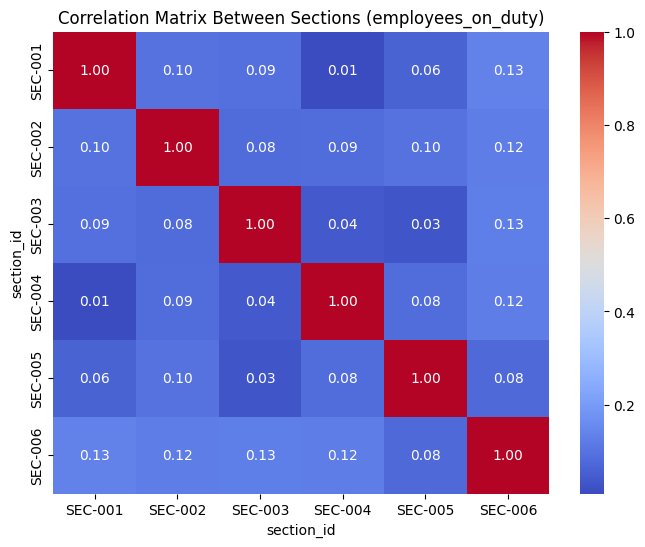

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Sections (employees_on_duty)')
plt.show()

In [ ]:
# Check for duplicate (date, section_id) pairs
duplicates = df[df.duplicated(subset=['date', 'section_id'], keep=False)]
print("Duplicate (date, section_id) pairs:")
print(duplicates)

# Check for missing sections for each date
section_counts = df.groupby('date')['section_id'].nunique()
missing_sections_dates = section_counts[section_counts < 6]
print("\nDates with missing sections (less than 6):")
print(missing_sections_dates)

# Check for duplicate sections in the same date
duplicate_sections = df.groupby(['date', 'section_id']).size()
duplicate_sections = duplicate_sections[duplicate_sections > 1]
print("\nDates with duplicate sections:")
print(duplicate_sections)